In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Load and preprocess the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/FracAtlas/images/',
    label_mode='binary',
    seed=123,
    validation_split=0.2,
    subset="both",
    image_size=(512, 512),
    batch_size=16,
    color_mode='grayscale'
)

Found 3996 files belonging to 2 classes.
Using 3197 files for training.
Using 799 files for validation.


In [3]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [4]:
model = tf.keras.Sequential([
    #data_augmentation,
    layers.Conv2D(64, 3, activation='relu', input_shape=(512, 512, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

model.fit(dataset[0], epochs=10)

Epoch 1/10


KeyboardInterrupt: 

In [6]:
loss, accuracy, auc, precision, recall = model.evaluate(dataset[1])
print(f'Loss: {loss}, Accuracy: {accuracy}, AUC: {auc}, Precision: {precision}, Recall: {recall}')

50/50 [==============================] - 5s 86ms/step - loss: 3.4900 - accuracy: 0.7997 - auc: 0.6126 - precision: 0.8493 - recall: 0.9192
Loss: 3.490009069442749, Accuracy: 0.7997496724128723, AUC: 0.6126130223274231, Precision: 0.8492957949638367, Recall: 0.9192073345184326


50/50 [==============================] - 3s 64ms/step
              precision    recall  f1-score   support

         0.0       0.40      0.25      0.31       143
         1.0       0.85      0.92      0.88       656

    accuracy                           0.80       799
   macro avg       0.63      0.59      0.60       799
weighted avg       0.77      0.80      0.78       799

[[ 36 107]
 [ 53 603]]
Confusion Matrix:


<Axes: >

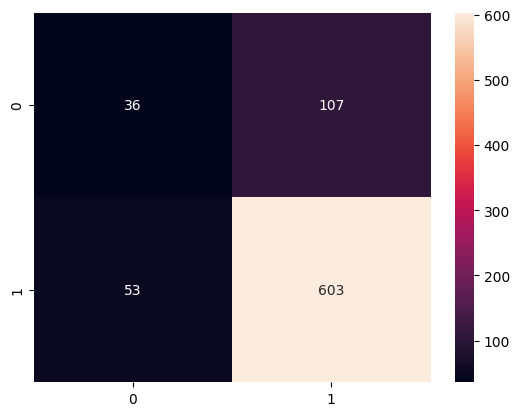

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get the predictions on the validation data
y_pred = model.predict(dataset[1])

# Convert the predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the true labels from the validation data
y_true = np.concatenate([y for x, y in dataset[1]], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_binary)
print(report)

# Generate the confusion matrix
matrix = confusion_matrix(y_true, y_pred_binary)
print(matrix)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_true,y_pred_binary),annot = True,fmt='d')

In [10]:
model.save('frac_atlas_model')

INFO:tensorflow:Assets written to: frac_atlas_model\assets


INFO:tensorflow:Assets written to: frac_atlas_model\assets


In [3]:
model2 = tf.keras.Sequential([
    #data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(512, 512, 1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [4]:
# Compile and train the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

model2.fit(dataset[0], epochs=20, validation_data=dataset[1], callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],  class_weight={0: 3, 1: 1})

Epoch 1/10
200/200 [==============================] - 79s 339ms/step - loss: 10.7973 - accuracy: 0.4091 - auc: 0.5416 - precision: 0.8398 - recall: 0.3458 - val_loss: 0.6887 - val_accuracy: 0.2641 - val_auc: 0.5907 - val_precision: 0.9857 - val_recall: 0.1052
Epoch 2/10
200/200 [==============================] - 61s 306ms/step - loss: 1.1982 - accuracy: 0.3688 - auc: 0.6160 - precision: 0.8815 - recall: 0.2665 - val_loss: 0.6719 - val_accuracy: 0.3379 - val_auc: 0.5809 - val_precision: 0.8713 - val_recall: 0.2271
Epoch 3/10
200/200 [==============================] - 62s 307ms/step - loss: 1.1154 - accuracy: 0.4101 - auc: 0.6711 - precision: 0.9027 - recall: 0.3149 - val_loss: 0.6676 - val_accuracy: 0.3817 - val_auc: 0.6519 - val_precision: 0.9219 - val_recall: 0.2698
Epoch 4/10
200/200 [==============================] - 62s 307ms/step - loss: 1.0587 - accuracy: 0.5956 - auc: 0.7169 - precision: 0.9016 - recall: 0.5692 - val_loss: 0.6600 - val_accuracy: 0.7071 - val_auc: 0.6622 - val_pr

50/50 [==============================] - 4s 68ms/step
              precision    recall  f1-score   support

         0.0       0.29      0.35      0.32       143
         1.0       0.85      0.81      0.83       656

    accuracy                           0.73       799
   macro avg       0.57      0.58      0.57       799
weighted avg       0.75      0.73      0.74       799

Confusion Matrix:


<Axes: >

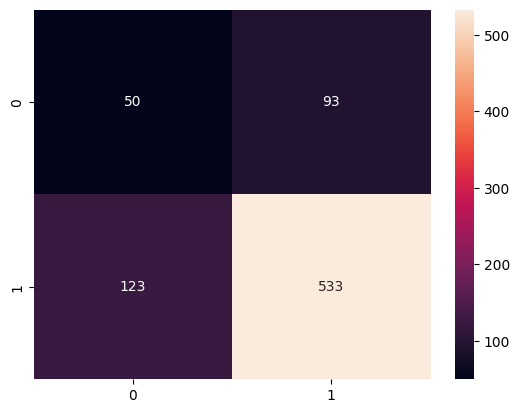

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get the predictions on the validation data
y_pred = model2.predict(dataset[1])

# Convert the predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the true labels from the validation data
y_true = np.concatenate([y for x, y in dataset[1]], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_binary)
print(report)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_true,y_pred_binary),annot = True,fmt='d')